In [3]:
import pandas as pd
# df = pd.read_csv('C:\\Users\\seanm\\Proton Drive\\sean.malley1\\Other computers\\EXACTLY5CATS\\d10\\Projects\\bigfoots-ufos-ghosts-oh-my\\data\\bfro_reports_geocoded.csv')
df = pd.read_csv('F:\\d10\\Projects\\bigfoots-ufos-ghosts-oh-my\\data\\bfro_reports_geocoded.csv')

In [2]:

cleaned_df = df.dropna(subset=['location', 'latitude', 'longitude'])




In [5]:
import folium


cleaned_df = df.dropna(subset=['location', 'latitude', 'longitude'])
# 200 points at first because computer froze last time 
num_rows = min(500, len(cleaned_df))


if not cleaned_df.empty:
    first_point = cleaned_df.iloc[0]
    m = folium.Map(location=[first_point['latitude'], first_point['longitude']], zoom_start=5)

    # 1st 200 rows to be marked
    for index, row in cleaned_df.iloc[:num_rows].iterrows():
        folium.Marker(location=[row['latitude'], row['longitude']]).add_to(map)

  

    
    display(map)
else:
    print("you messed up, buddy.")



AttributeError: type object 'map' has no attribute 'add_child'

In [6]:
import folium

cleaned_df = df.dropna(subset=['location', 'latitude', 'longitude'])

num_rows = min(500, len(cleaned_df))

if not cleaned_df.empty:
    first_point = cleaned_df.iloc[0]
    m = folium.Map(location=[first_point['latitude'], first_point['longitude']], zoom_start=5)

 
    for index, row in cleaned_df.iloc[:num_rows].iterrows():
        folium.Marker(location=[row['latitude'], row['longitude']]).add_to(m)


    display(m)
else:
    print("You messed up, buddy.")


In [4]:
def clean_data(df):
    
    # df = df[df['state'] == "Maine"]
    
    df = df.groupby(['state']).agg(state_count=('state', 'count')).reset_index()
    return df

df_clean = clean_data(df.copy())
df_clean.head(49)

def clean_data(df_clean):
    
    df_clean = df_clean.sort_values(['state_count'], ascending=[False])
    return df_clean

df_clean_1 = clean_data(df_clean.copy())
df_clean_1.head(55)





,state,state_count
45,Washington,610
4,California,422
8,Florida,306
33,Ohio,306
35,Oregon,249
11,Illinois,238
41,Texas,231
20,Michigan,217
23,Missouri,159
9,Georgia,129


In [5]:
def clean_data(df_clean_1):
    
    df_clean_1 = df_clean_1.rename(columns={'state': 'State'})
    
    df_clean_1 = df_clean_1.rename(columns={'state_count': 'Sightings'})
    return df_clean_1

df_clean_2 = clean_data(df_clean_1.copy())
df_clean_2.head()

,State,Sightings
45,Washington,610
4,California,422
8,Florida,306
33,Ohio,306
35,Oregon,249


In [14]:
def clean_data(filtered_df2):
    
    filtered_df2 = filtered_df2.rename(columns={'county': 'County'})
    
    filtered_df2 = filtered_df2.rename(columns={'state': 'State'})
    
    filtered_df2 = filtered_df2.rename(columns={'row_count': 'Sightings'})
    return filtered_df2

filtered_df2_clean = clean_data(filtered_df2.copy())
filtered_df2_clean.head(15)

,State,County,Sightings
12,California,Humboldt County,45
13,California,Tuolumne County,36
14,California,Siskiyou County,31
22,Florida,Collier County,21
23,Florida,Lake County,19
24,Florida,Marion County,19
97,Ohio,Portage County,19
98,Ohio,Guernsey County,15
99,Ohio,Columbiana County,12
103,Oregon,Clackamas County,27


In [12]:
top_counties = df.groupby(['state', 'county']).size().reset_index(name='row_count')
top_counties = top_counties.groupby('state').apply(lambda x: x.nlargest(3, 'row_count')).reset_index(drop=True)

filtered_df2 = top_counties[top_counties['state'].isin(['Washington', 'California', 'Florida', 'Ohio', 'Oregon'])]
filtered_df2.head(55)


,state,county,row_count
12,California,Humboldt County,45
13,California,Tuolumne County,36
14,California,Siskiyou County,31
22,Florida,Collier County,21
23,Florida,Lake County,19
24,Florida,Marion County,19
97,Ohio,Portage County,19
98,Ohio,Guernsey County,15
99,Ohio,Columbiana County,12
103,Oregon,Clackamas County,27


In [11]:
top_counties = df.groupby(['state', 'county']).size().reset_index(name='row_count')
top_counties = top_counties.groupby('state').apply(lambda x: x.nlargest(3, 'row_count')).reset_index(drop=True)

filtered_df2 = top_counties[top_counties['state'].isin(['Washington', 'California', 'Florida', 'Ohio', 'Oregon'])]
filtered_df2.head(55)

# top_counties.head(55)

,state,county,row_count
12,California,Humboldt County,45
13,California,Tuolumne County,36
14,California,Siskiyou County,31
22,Florida,Collier County,21
23,Florida,Lake County,19
24,Florida,Marion County,19
97,Ohio,Portage County,19
98,Ohio,Guernsey County,15
99,Ohio,Columbiana County,12
103,Oregon,Clackamas County,27


In [19]:
df.head()

,observed,location_details,county,state,season,title,latitude,longitude,date,number,...,precip_probability,precip_type,pressure,summary,conditions,uv_index,visibility,wind_bearing,wind_speed,location
0,I am not sure how relevant this report will be...,"We were on our way to Rapid City, so we were h...",Washakie County,Wyoming,Summer,NaN,NaN,NaN,NaN,798.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I don't know if what I saw was two bigfoots or...,"Heading to the deep mine Poca #2, the airshaft...",Wyoming County,West Virginia,Winter,Report 13237: Daylight sighting near an abando...,37.58135,-81.29745,2005-12-03,13237.0,...,100.0,"['rain', 'snow']",1018.7,Partly cloudy throughout the day with late aft...,"Snow, Rain, Partially cloudy",NaN,9.3,168.1,17.1,POINT(-81.29745 37.58135)
2,"My family and I went to Ludlow, Vermont for Co...",It's off Rt 100 outside of Ludlow Vermont. It ...,Windsor County,Vermont,Fall,Report 13285: Evening sighting by motorists on...,43.46540,-72.70510,2005-10-08,13285.0,...,100.0,['rain'],1011.8,Cloudy skies throughout the day with a chance ...,"Rain, Overcast",NaN,5.0,356.2,7.6,POINT(-72.7051 43.4654)
3,It was spring break 1984 and I was 16 at the t...,"Wythe county Virginia near Wytheville, looking...",Wythe County,Virginia,Spring,"Report 2285: Boy sees ""Bigfoot"" in the woods w...",37.22647,-81.09017,1984-04-08,2285.0,...,0.0,NaN,1020.9,Partly cloudy throughout the day.,Partially cloudy,NaN,13.0,107.3,11.5,POINT(-81.09017 37.22647)
4,It was the winter of 1996 and we were on our w...,"Hwy 182, Wood County Between Quitman, Texas an...",Wood County,Texas,Winter,Report 2048: Night time road crossing observation,32.79430,-95.54250,1996-12-22,2048.0,...,0.0,NaN,NaN,Partly cloudy throughout the day.,Partially cloudy,NaN,10.5,180.4,20.8,POINT(-95.5425 32.7943)


In [ ]:

def clean_data(df):
    
    df = df[df['state'] == "ohio"]
   
    df = df.groupby(['state']).agg(state_count=('state', 'count')).reset_index()
    return df

df_clean = clean_data(df.copy())
df_clean.head()

In [18]:
cleaned_df.head()

,observed,location_details,county,state,season,title,latitude,longitude,date,number,...,precip_probability,precip_type,pressure,summary,conditions,uv_index,visibility,wind_bearing,wind_speed,location
1,I don't know if what I saw was two bigfoots or...,"Heading to the deep mine Poca #2, the airshaft...",Wyoming County,West Virginia,Winter,Report 13237: Daylight sighting near an abando...,37.58135,-81.29745,2005-12-03,13237.0,...,100.0,"['rain', 'snow']",1018.7,Partly cloudy throughout the day with late aft...,"Snow, Rain, Partially cloudy",NaN,9.3,168.1,17.1,POINT(-81.29745 37.58135)
2,"My family and I went to Ludlow, Vermont for Co...",It's off Rt 100 outside of Ludlow Vermont. It ...,Windsor County,Vermont,Fall,Report 13285: Evening sighting by motorists on...,43.46540,-72.70510,2005-10-08,13285.0,...,100.0,['rain'],1011.8,Cloudy skies throughout the day with a chance ...,"Rain, Overcast",NaN,5.0,356.2,7.6,POINT(-72.7051 43.4654)
3,It was spring break 1984 and I was 16 at the t...,"Wythe county Virginia near Wytheville, looking...",Wythe County,Virginia,Spring,"Report 2285: Boy sees ""Bigfoot"" in the woods w...",37.22647,-81.09017,1984-04-08,2285.0,...,0.0,NaN,1020.9,Partly cloudy throughout the day.,Partially cloudy,NaN,13.0,107.3,11.5,POINT(-81.09017 37.22647)
4,It was the winter of 1996 and we were on our w...,"Hwy 182, Wood County Between Quitman, Texas an...",Wood County,Texas,Winter,Report 2048: Night time road crossing observation,32.79430,-95.54250,1996-12-22,2048.0,...,0.0,NaN,NaN,Partly cloudy throughout the day.,Partially cloudy,NaN,10.5,180.4,20.8,POINT(-95.5425 32.7943)
7,"While attending U.R.I in the Fall of 1974,I wo...","Great swamp area, Narragansett Indians",Washington County,Rhode Island,Fall,Report 6496: Bicycling student has night encou...,41.45000,-71.50000,1974-09-20,6496.0,...,0.0,NaN,1020.6,Cloudy skies throughout the day.,Overcast,NaN,2.6,196.6,15.0,POINT(-71.5 41.45)


In [10]:
cleaned_df['date'] = pd.to_datetime(df['date'], errors='coerce')
df_2010 = cleaned_df[cleaned_df['date'].dt.year == 2010]


C:\Users\seanm\AppData\Local\Temp\ipykernel_8772\265432436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [11]:
df_2010.head()

,observed,location_details,county,state,season,title,latitude,longitude,date,number,...,precip_probability,precip_type,pressure,summary,conditions,uv_index,visibility,wind_bearing,wind_speed,location
12,Well last year I was night fishing 9/2010 at A...,Both sightings were on the North east corner o...,Westchester County,New York,Fall,Report 31940: Fishermen and Law Enforcement Of...,41.29873,-73.73717,2010-09-01,31940.0,...,0.0,NaN,1017.0,Clear conditions throughout the day.,Clear,NaN,6.7,262.6,6.3,POINT(-73.73717 41.29873)
24,"Yesterday,I ,my dad,my son,and his Friend, wen...",Rural Wilson County Tennessee,Wilson County,Tennessee,Summer,Report 28005: Two witnesses recount a close da...,36.25466,-86.15759,2010-07-16,28005.0,...,100.0,['rain'],1015.3,Partly cloudy throughout the day with late aft...,"Rain, Partially cloudy",NaN,9.7,193.0,11.4,POINT(-86.15759 36.25466)
142,"I was driving on a backroad in Rhinebeck, NY. ...",From the Rhinecliff Bridge heading towards Rhi...,Dutchess County,New York,Summer,Report 26205: Young adult has daylight visual ...,41.94512,-73.87915,2010-02-15,26205.0,...,100.0,"['rain', 'snow']",1005.3,Clearing in the afternoon with late afternoon ...,"Snow, Rain, Partially cloudy",NaN,9.3,243.2,8.6,POINT(-73.87915 41.94512)
150,Bigfoot Sighting Date: Early August 2010 Time:...,Cascade Lake,Essex County,New York,Summer,Report 64192: Camper describes morning sightin...,44.22388,-73.87529,2010-08-06,64192.0,...,0.0,NaN,1005.2,Partly cloudy throughout the day.,Partially cloudy,NaN,9.9,292.3,13.4,POINT(-73.87529 44.22388)
156,My friend and I finished preparing for a big o...,(Specific directions omitted),Hamilton County,New York,Fall,Report 28570: Possible nighttime encounter out...,43.30679,-74.15429,2010-09-24,28570.0,...,0.0,NaN,1013.7,Partly cloudy throughout the day.,Partially cloudy,NaN,9.5,186.5,13.7,POINT(-74.15429 43.30679)


In [16]:
# num_rows = min(500, len(cleaned_df))
# # trying to make the map smaller. didn't seem to work, commenting out 
# from branca.element import Figure
# fig = Figure(width=500, height=300) 
# fig.add_child(m)
# fig


if not df_2010.empty:
    first_point = df_2010.iloc[0]
    m = folium.Map(location=[first_point['latitude'], first_point['longitude']], zoom_start=5)

 
    for index, row in df_2010.iloc[:num_rows].iterrows():
        folium.Marker(location=[row['latitude'], row['longitude']]).add_to(m)


    display(m)
else:
    print("You messed up, buddy.")

In [22]:
df_until_2010 = cleaned_df[cleaned_df['date'].dt.year <= 2010]
num_rows = min(10000, len(df_until_2010))


In [23]:
if not df_until_2010.empty:
    first_point = df_until_2010.iloc[0]
    m = folium.Map(location=[first_point['latitude'], first_point['longitude']], zoom_start=5)

 
    for index, row in df_2010.iloc[:num_rows].iterrows():
        folium.Marker(location=[row['latitude'], row['longitude']]).add_to(m)


    display(m)
else:
    print("You messed up, buddy.")

<Axes: xlabel='state'>

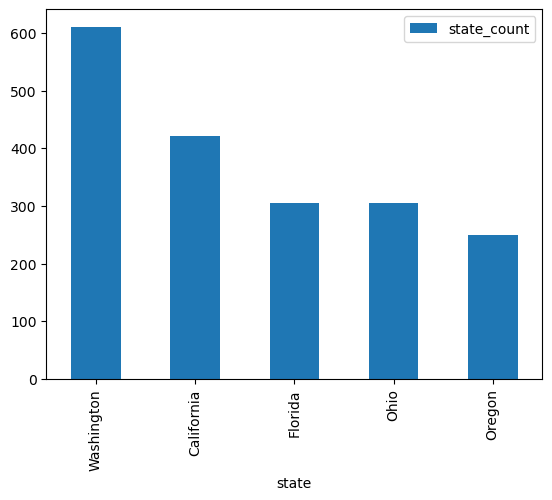

In [36]:
top_5_states = df_clean_1.head(5)
top_5_states.plot(x='state', y='state_count', kind='bar')


In [39]:
pip install wordcloud

   ---------------------------------------- 0.0/300.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.0 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.0 kB 960.0 kB/s eta 0:00:01
   ------------------------- -------------- 194.6/300.0 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 300.0/300.0 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


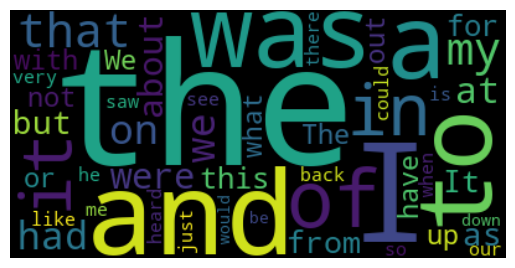

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


top_25_words = df['observed'].str.split().explode().value_counts().head(10)


wordcloud = WordCloud().generate_from_frequencies(top_25_words)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

